Music Composition using Transformers

In [ ]:
#Original code by:

#https://github.com/bearpelican/musicautobot/tree/15bc523548f8ae737a594ee92564538d02e0dc94

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!git clone https://github.com/bearpelican/musicautobot.git
import os
os.chdir('musicautobot')

Cloning into 'musicautobot'...
remote: Enumerating objects: 4131, done.
remote: Total 4131 (delta 0), reused 0 (delta 0), pack-reused 4131
Receiving objects: 100% (4131/4131), 83.43 MiB | 15.37 MiB/s, done.
Resolving deltas: 100% (2992/2992), done.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')
#%cd content/drive/MyDrive/DLASP/Proyecto_Final/MusicAutobot/musicautobot-master/musicautobot-master/musicautobot

In [ ]:
from musicautobot.numpy_encode import *
!pip install pebble
!pip install git+https://github.com/fastai/fastai1.git
!pip install enum
from enum import Enum
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/fastai/fastai1.git to /tmp/pip-req-build-rolmo4rf
  Running command git clone -q https://github.com/fastai/fastai1.git /tmp/pip-req-build-rolmo4rf
     |████████████████████████████████| 355 kB 6.1 MB/s 
  Created wheel for fastai: filename=fastai-1.0.64.dev0-py3-none-any.whl size=241906 sha256=0e117146649c701fb3795b173e42cd79e323e742f64a2ffd20f8a08286fea5e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-qoaushgz/wheels/4f/26/4f/0cc93498278a4fdef45e8e73e848cceba2470a66ed895658e0
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=dcee280a24442c6190b4696b68a4d31b1c5361c5459876cc59b22dbbc921ddf3
  Stored in directory: /root/.cache/pip/wheels/b9/b1/68/cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
Successfully 

In [ ]:
!pip install musescore
print('installing lilypond...')
!apt-get install lilypond > /dev/null

print('installing musescore...')
!sudo apt-get install musescore

print('installing fluidsynth...')
!apt-get install fluidsynth > /dev/null
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

print('done!')

import music21
from music21 import *
from IPython.display import Image, Audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
installing lilypond...
Extracting templates from packages: 100%
installing musescore...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  avahi-daemon bind9-host desktop-file-utils fluidr3mono-gm-soundfont
  geoclue-2.0 geoip-database gstreamer1.0-plugins-base iio-sensor-proxy
  libavahi-core7 libavahi-glib1 libbind9-160 libbrotli1 libcap2-bin
  libcdparanoia0 libdaemon0 libdns1100 libgeoclue-2-0 libgeoip1
  libgl1-mesa-glx libgstreamer-plugins-base1.0-0 libgstreamer1.0-0 libhyphen0
  libisc169 libisccc160 libisccfg160 liblwres160 libmbim-glib4 libmbim-proxy
  libmm-glib0 libnl-genl-3-200 libnss-mdns liborc-0.4-0 libpam-cap
  libportaudio2 libpulsedsp 

In [ ]:
environment.keys()

['directoryScratch',
 'lilypondPath',
 'lilypondVersion',
 'lilypondFormat',
 'lilypondBackend',
 'musicxmlPath',
 'midiPath',
 'graphicsPath',
 'vectorPath',
 'pdfPath',
 'braillePath',
 'musescoreDirectPNGPath',
 'showFormat',
 'writeFormat',
 'ipythonShowFormat',
 'autoDownload',
 'debug',
 'warnings',
 'localCorpusSettings',
 'localCorporaSettings',
 'manualCoreCorpusPath',
 'localCorpusPath']

In [ ]:
environment.set('musescoreDirectPNGPath', '/usr/bin/musescore')

In [ ]:
# Colab cannot play music directly from music21 - must convert to .wav first
!pip install midi2audio
from midi2audio import FluidSynth

def play_wav(stream):
    out_midi = stream.write('midi')
    out_wav = str(Path(out_midi).with_suffix('.wav'))
    FluidSynth("font.sf2").midi_to_audio(out_midi, out_wav)
    return Audio(out_wav)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Generate Music with Pretrained Model

### Load Pretrained

In [ ]:
# Location of your midi files
midi_path =  Path('data/midi/examples')

# Location of saved datset
data_path = Path('data/numpy')

In [ ]:
# Data
data = MusicDataBunch.empty(data_path)
vocab = data.vocab

# For Saved Data:
# data = load_data(data_path, 'musicitem_data_save.pkl')

In [ ]:
# Create numpy and pretrained folder directly.
import os.path
from os import path

if path.exists('data/numpy/pretrained') == False:
  os.mkdir('data/numpy')
  os.mkdir('data/numpy/pretrained')

In [ ]:
# Pretrained Model
# Download pretrained model if you haven't already
pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MusicTransformerKeyC.pth'
# pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MusicTransformer.pth'

pretrained_path = data_path/'pretrained'/Path(pretrained_url).name
download_url(pretrained_url, dest=pretrained_path)

In [ ]:
# Learner
learn = music_model_learner(data, pretrained_path=pretrained_path)

## Prediction

#### Choose existing midi file as a starting point

In [ ]:
midi_files = get_files(midi_path, recurse=True, extensions='.mid'); midi_files[:]

[PosixPath('data/midi/examples/Middle - Zedd - Pre-Chorus.mid'),
 PosixPath('data/midi/examples/Shining In The Sky.mid'),
 PosixPath('data/midi/examples/In The Hall Of The Mountain King - Edvard Grieg - Intro.mid'),
 PosixPath('data/midi/examples/Locked Out Of Heaven - Bruno Mars - Chorus.mid'),
 PosixPath('data/midi/examples/Can You Feel The Love Tonight - Elton John - Verse.mid'),
 PosixPath('data/midi/examples/Fuer Elise - Ludwig Van Beethoven - Verse.mid'),
 PosixPath('data/midi/examples/Colors Of The Wind - Disney - Chorus.mid'),
 PosixPath('data/midi/examples/Let It Go - Idina Menzel - Chorus.mid'),
 PosixPath('data/midi/examples/The Four Seasons Concerto No 4 Winter - Antonio Vivaldi - Instrumental.mid'),
 PosixPath('data/midi/examples/Roses Ft Rozes - The Chainsmokers - Chorus.mid'),
 PosixPath('data/midi/examples/Just Give Me A Reason - Pink - Chorus.mid'),
 PosixPath('data/midi/examples/Scary Monsters And Nice Sprites - Skrillex - Pre-Chorus.mid'),
 PosixPath('data/midi/examp

In [ ]:
idx = 14
f = midi_files[idx]; f

PosixPath('data/midi/examples/vp3-1pre.mid')

#### NextWord/Autocomplete

Trim the song to only a few notes. Model will use these notes a seed and continue the idea

In [ ]:
cutoff_beat = 10

item = MusicItem.from_file(f, data.vocab)
seed_item = item.trim_to_beat(cutoff_beat)

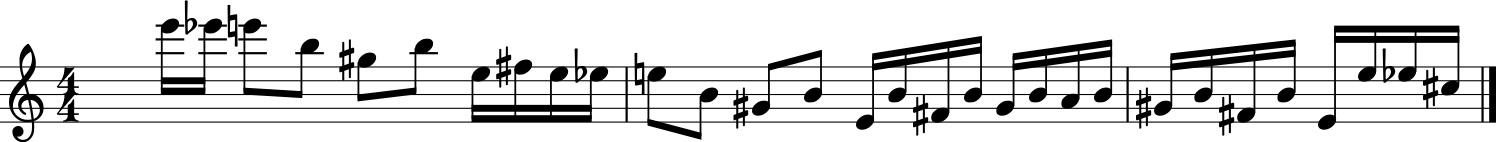

In [ ]:
seed_item.show()

In [ ]:
seed_item.play()
play_wav(seed_item.stream)

#### Use seed to predict next sequence

In [ ]:
note_temp = 1.1 #1.1 Determines amount of variation in note pitches
dur_temp = 0.4 #0.4 Amount of randomness in rhythm
top_k = 24 #24
pred, full = learn.predict(seed_item, n_words=400, temperatures=(note_temp, dur_temp), min_bars=12, top_k=top_k, top_p=0.7)

/content/musicautobot/musicautobot/music_transformer/model.py:63: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bar_pos = pos // self.beat_len % self.max_bar_len
/content/musicautobot/musicautobot/music_transformer/learner.py:120: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  if ((last_pos - start_pos) // 16) <= min_bars: logits[vocab

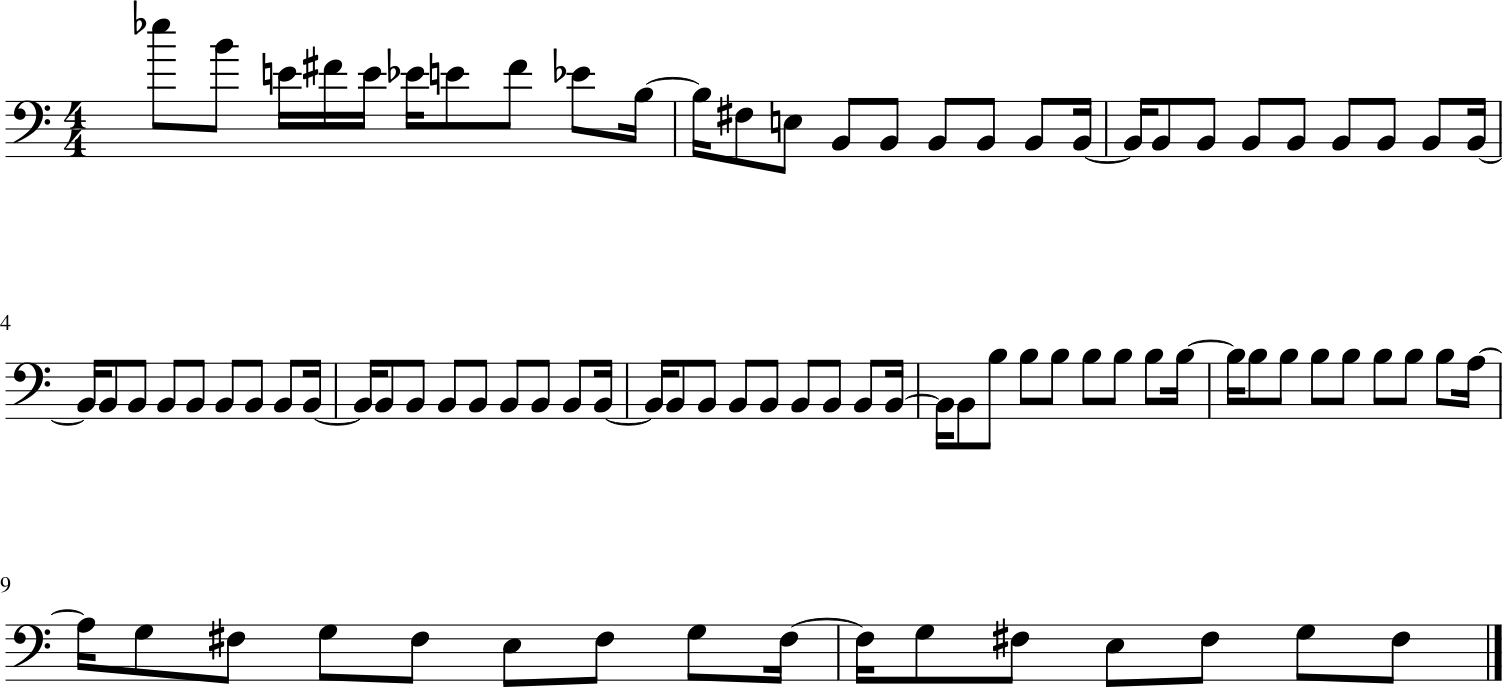

In [ ]:
pred.show()

In [ ]:
pred.play()
play_wav(pred.stream)

Output hidden; open in https://colab.research.google.com to view.

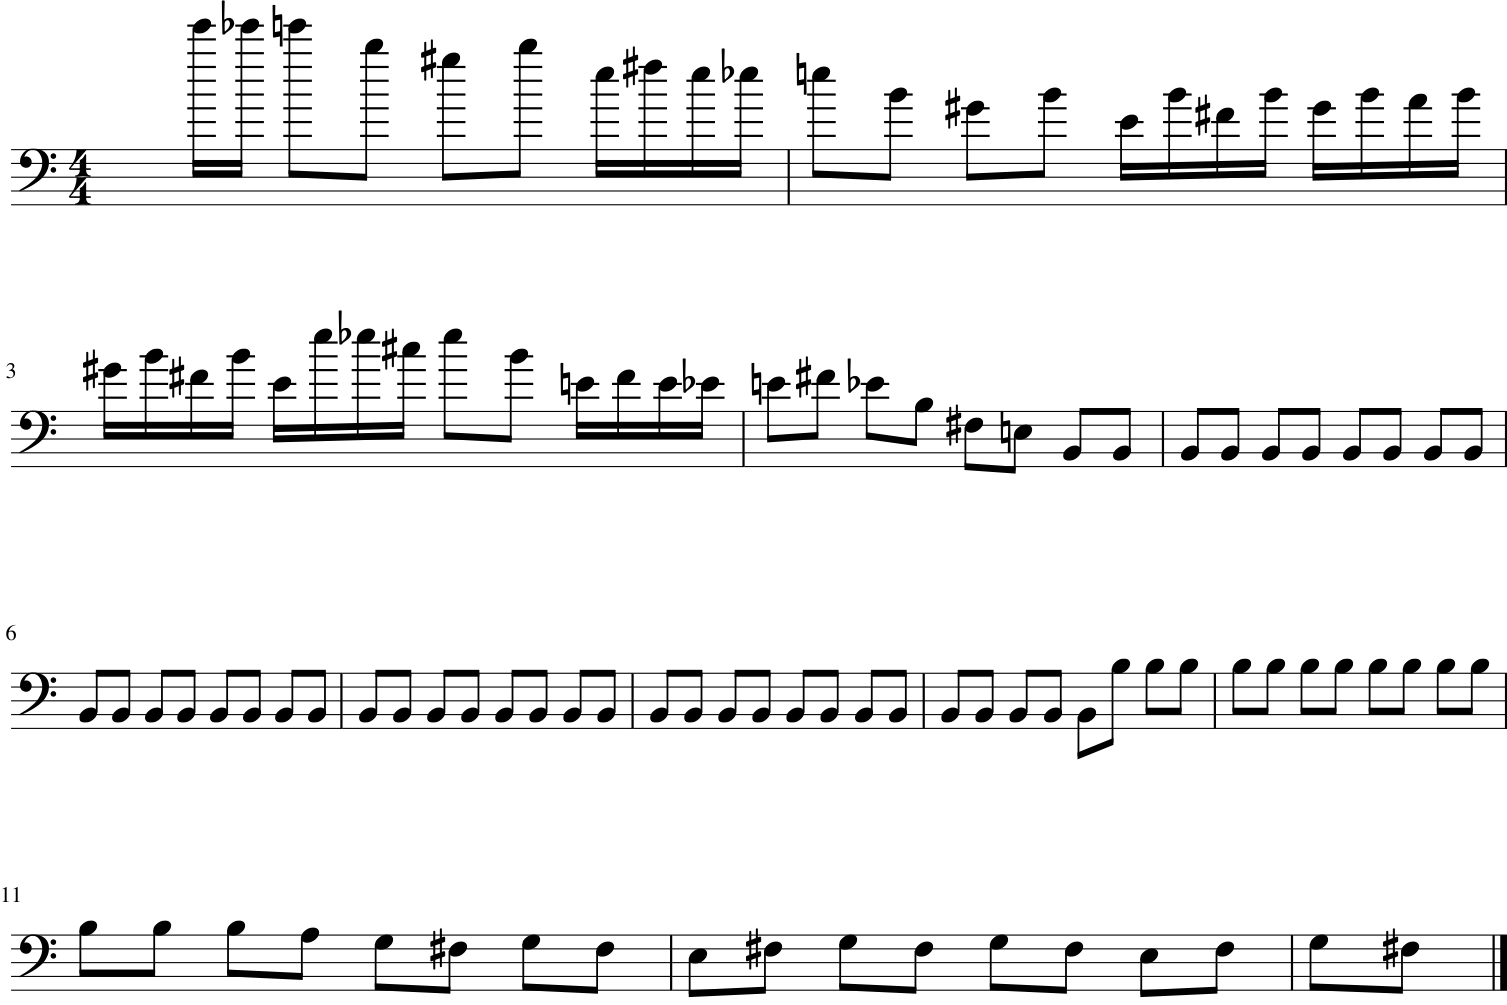

In [ ]:
full_song = seed_item.append(pred); full_song.show()

In [ ]:
full_song.play()
play_wav(full_song.stream)

Output hidden; open in https://colab.research.google.com to view.

#### Add More Randomness to prediction

In [ ]:
note_temp = 1.4 # Determines amount of variation in note pitches
dur_temp = 0.8 # Amount of randomness in rhythm
top_k = 30
pred2, full = learn.predict(seed_item, n_words=400, temperatures=(note_temp, dur_temp), min_bars=12, top_k=top_k, top_p=0.7)

/content/musicautobot/musicautobot/music_transformer/model.py:63: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bar_pos = pos // self.beat_len % self.max_bar_len
/content/musicautobot/musicautobot/music_transformer/learner.py:120: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  if ((last_pos - start_pos) // 16) <= min_bars: logits[vocab

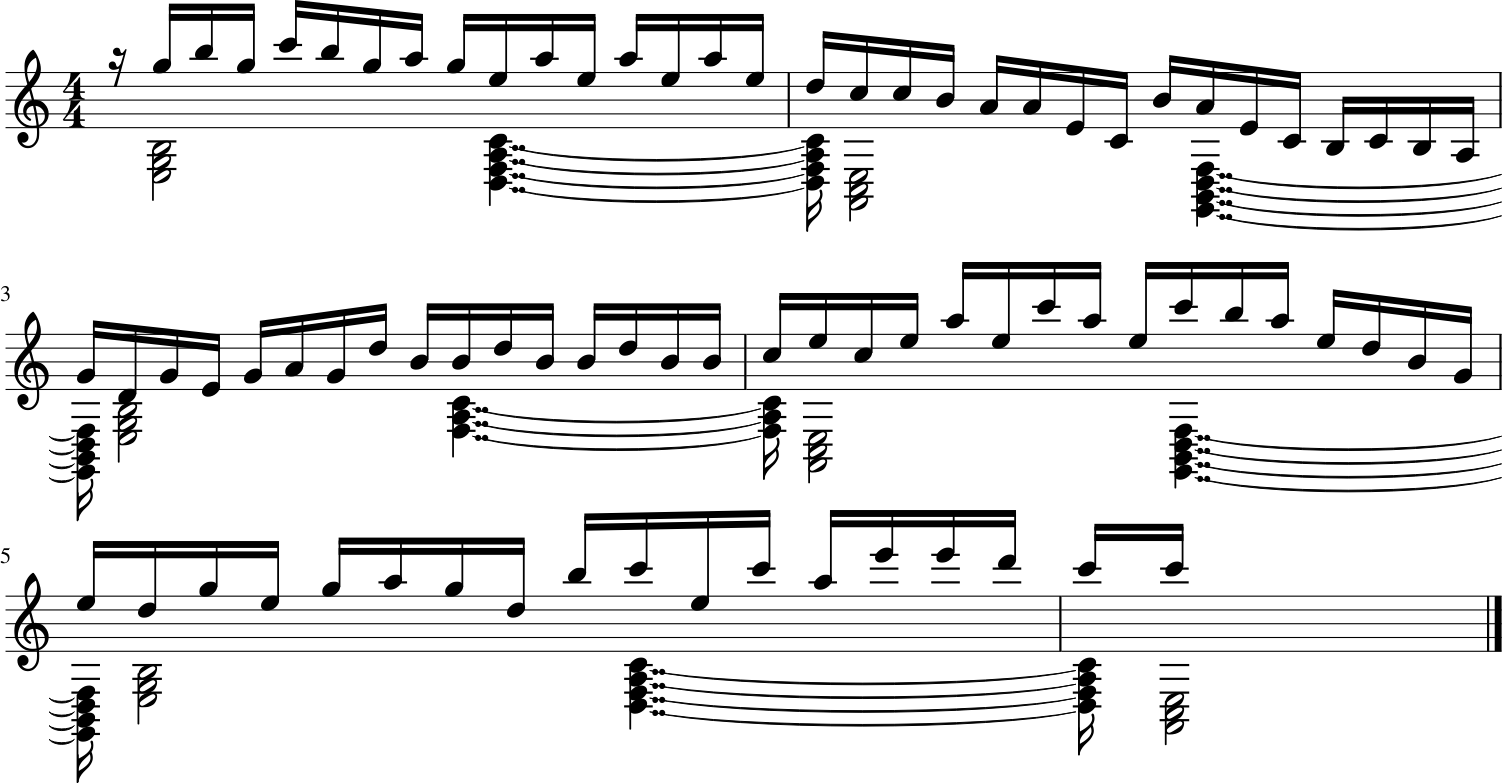

In [ ]:
pred2.show()

In [ ]:
pred2.play()
play_wav(pred2.stream)

Output hidden; open in https://colab.research.google.com to view.

#### Predict without a starting sequence

In [ ]:
empty_item = MusicItem.empty(vocab)

In [ ]:
pred3, full = learn.predict(empty_item, n_words=200)

In [ ]:
pred3.play()
play_wav(pred3.stream)